In [10]:
def function1(input1):
    return input1+ " from first funtion"    

In [11]:
def function2(input2):
    return input2+ " from second funtion"

In [12]:
def function3(input3):
    return input3+ " from third funtion"

In [13]:
 function1("LSK")

'LSK from first funtion'

In [39]:
from langgraph.graph import Graph

In [40]:
workflow1 = Graph()

In [41]:
workflow1.add_node("fun1",function1)

In [42]:
workflow1.add_node("fun2",function2)

In [43]:
workflow1.add_node("fun3",function3)

In [44]:
workflow1.set_entry_point("fun1")

In [45]:
workflow1.add_edge("fun1","fun2")

In [46]:
workflow1.add_edge("fun2","fun3")

In [48]:
workflow1.set_finish_point("fun3")

In [49]:
app = workflow1.compile()

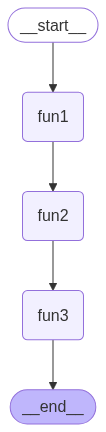

In [50]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [51]:
app.invoke("LSK")

'LSK from first funtion from second funtion from third funtion'

In [52]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun3': Node(id='fun3', name='fun3', data=fun3(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='fun3', data=None, conditional=False), Edge(source='fun3', target='__end__', data=None, conditional=False)])

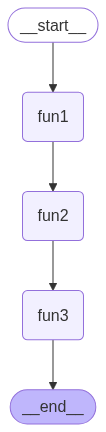

In [53]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_openai import ChatOpenAI

In [86]:
def llm(input):
    llm = ChatOpenAI(model='o1-mini')
    output = llm.invoke(input)
    return output.content

In [55]:
llm.invoke('what is your version and till when you got trained')

AIMessage(content='Hello! I’m ChatGPT, based on OpenAI’s GPT-4 architecture. My training includes information up until October 2023. If you have any questions or need assistance with something specific, feel free to ask!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 248, 'prompt_tokens': 18, 'total_tokens': 266, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 192, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'o1-mini-2024-09-12', 'system_fingerprint': 'fp_3da8b0b088', 'id': 'chatcmpl-BfgQcXyAXrOe0wedPImXsz9NDJXAq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--695aee5a-58ca-4bda-ada5-005a4476ce2c-0', usage_metadata={'input_tokens': 18, 'output_tokens': 248, 'total_tokens': 266, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 19

In [84]:
def token_counter(input):
    tokens = input.split()
    count = len(tokens)
    return f"total token number in the generated answer is {count}"

In [87]:
workflow2 = Graph()

In [88]:
workflow2.add_node("llm",llm)
workflow2.add_node("counter",token_counter)
workflow2.add_edge("llm","counter")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("counter")

In [89]:
app = workflow2.compile()

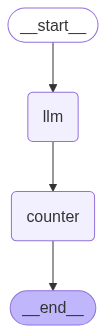

In [82]:
display(Image(app.get_graph().draw_mermaid_png()))

In [90]:
app.invoke("what is your name")

'total token number in the generated answer is 16'

In [91]:
app.invoke("what is your name and till what date you got trained")

'total token number in the generated answer is 31'